In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

In [2]:
def plotDiffr(input_data,idx_range = (1,2), n_diffr=2, with_noise = False, vmin='diffr.min()', vmax='diffr.max()'):
    """ Plot the diffraction pattern.

    Args:
            input_data (str): input hdf5 file name.
            idx_range (list-like): idx_range to plot
                                   idx = 1 is the first frame
            n_diffr (int): number of diffractions to plot, it will use linspace in the idx_range.
            vmin (str): eval command for vmin in imshow
            vmax (str): eval command for vmax in imshow

    """
    with h5py.File(input_data,'r') as fh:
        print (fh['data'])
        plot_range = np.linspace(idx_range[0],idx_range[1],num=n_diffr)
        for i in plot_range:
            frame = '{:07}'.format(int(i))
            print (frame)
            diffr = fh['data/'+frame+'/diffr'][0]
            if with_noise:
                diffr = np.random.poisson(diffr)          
            plt.figure()
            plt.imshow(diffr,norm=colors.LogNorm(vmin=eval(vmin), vmax=eval(vmax)),origin='lower')
            plt.colorbar()
            print ('mean={:.2f}, max={:.2f}, min={:.2f}'.format(diffr.mean(),diffr.max(),diffr.min()))

def plotDiffrLegacy(input_data,idx_range = (1,2), n_diffr=2, with_noise = False, vmin='diffr.min()', vmax='diffr.max()'):
    """ Plot the diffraction pattern (legacy).

    Args:
            input_data (str): input hdf5 file name.
            idx_range (list-like): idx_range to plot
                                   idx = 1 is the first frame
            n_diffr (int): number of diffractions to plot, it will use linspace in the idx_range.
            vmin (str): eval command for vmin in imshow
            vmax (str): eval command for vmax in imshow

    """
    with h5py.File(input_data,'r') as fh:
        print (fh['data'])
        plot_range = np.linspace(idx_range[0],idx_range[1],num=n_diffr)
        for i in plot_range:
            frame = '{:07}'.format(int(i))
            print (frame)
            if with_noise:
                diffr = fh['data/'+frame+'/data'][...]   
            else:
                diffr = fh['data/'+frame+'/diffr'][...]
            print ('mean={:.3e}, max={:.3e}, min={:.3e}'.format(diffr.mean(),diffr.max(),diffr.min()))
            plt.figure()
            plt.imshow(diffr,norm=colors.LogNorm(vmin=eval(vmin), vmax=eval(vmax)),origin='lower')
            plt.colorbar()

def plotDiffrDragonfly(input_data,idx_range = (1,2), n_diffr=2, with_noise = False, vmin='diffr.min()', vmax='diffr.max()'):
    """ Plot the diffraction pattern (legacy).

    Args:
            input_data (str): input hdf5 file name.
            idx_range (list-like): idx_range to plot
                                   idx = 1 is the first frame
            n_diffr (int): number of diffractions to plot, it will use linspace in the idx_range.
            vmin (str): eval command for vmin in imshow
            vmax (str): eval command for vmax in imshow

    """
    with h5py.File(input_data,'r') as fh:
        print (fh['diffr'].shape)
        plot_range = np.linspace(idx_range[0],idx_range[1],num=n_diffr)
        for i in plot_range:
            print (int(i))
            if with_noise:
                diffr = fh['data'][i]   
            else:
                diffr = fh['diffr'][i]
            print ('mean={:.3e}, max={:.3e}, min={:.3e}'.format(diffr.mean(),diffr.max(),diffr.min()))
            plt.figure()
            plt.imshow(diffr,norm=colors.LogNorm(vmin=eval(vmin), vmax=eval(vmax)),origin='lower')
            plt.colorbar()

In [3]:
input_data = './cov-19.h5'

<HDF5 group "/data" (360 members)>
0000001
mean=2.186e+01, max=4.457e+03, min=6.239e-06
0000040
mean=1.718e+01, max=4.465e+03, min=2.696e-05
0000080
mean=2.112e+01, max=4.399e+03, min=1.167e-04
0000120
mean=2.772e+01, max=4.462e+03, min=1.393e-04
0000160
mean=2.275e+01, max=4.504e+03, min=2.035e-04
0000200
mean=2.222e+01, max=4.496e+03, min=4.602e-05
0000240
mean=3.329e+01, max=4.541e+03, min=5.031e-05
0000280
mean=2.116e+01, max=4.419e+03, min=2.208e-05
0000320
mean=2.639e+01, max=4.456e+03, min=7.892e-04
0000360
mean=2.396e+01, max=4.480e+03, min=1.486e-04


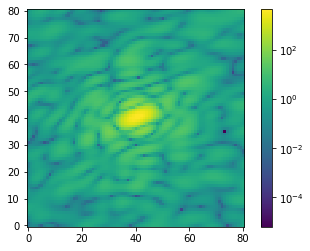

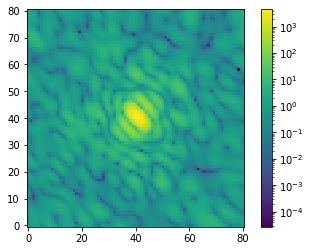

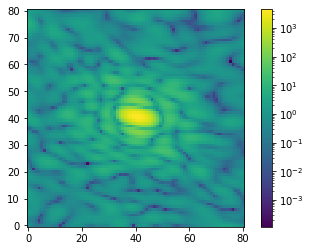

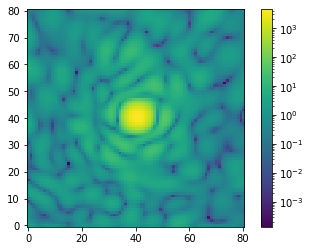

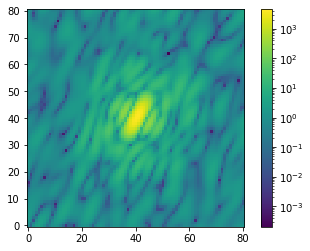

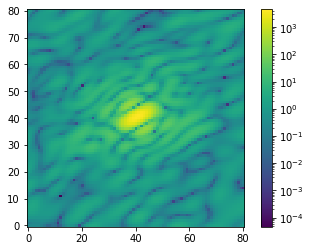

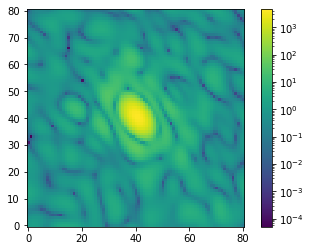

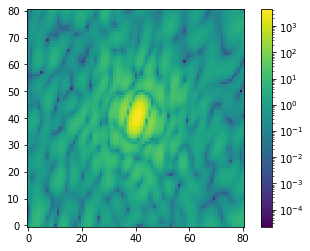

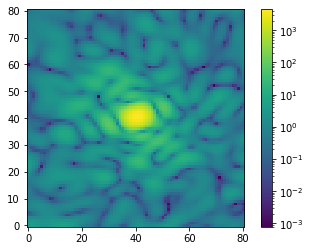

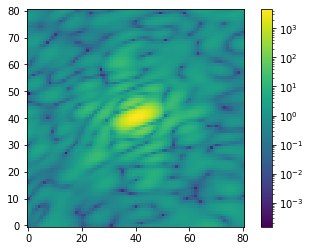

In [6]:
plotDiffrLegacy(input_data,idx_range=[1,360],n_diffr=10,vmin='diffr.min()+1e-8')